<a href="https://colab.research.google.com/github/DarkNacho/UTAL_MachineLearning2022-2/blob/main/proyecto_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Reconocimiento de Actividad Humana (HAR)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.rcParams["figure.figsize"] = (20,10)


### OBTAIN

Se cargan los datos y se le asigna nombre a las columnas.

In [2]:
columns = ['user','activity','timestamp', 'x', 'y', 'z']
df = pd.read_csv('Descargas/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', header = None, names = columns)\

### SCRUB

Se eliminan los valores **na** por defecto y se observan los datos

In [3]:
df=df.dropna()
df.head()

,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x          1098203 non-null  float64
 4   y          1098203 non-null  float64
 5   z          1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.7+ MB


Al haber analizado los datos ya sea de manera visual y viendo el tipo de dato como en el DataFrame, se es necesario corregir los valores en la columna correspondiente a *z*

In [5]:
df['z'] = df['z'].map(lambda x: str(re.findall("\d+\.\d+", str(x))))
df['z'] = df['z'].map(lambda x: x[2:-2])
df['z'] = pd.to_numeric(df['z'],errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x          1098203 non-null  float64
 4   y          1098203 non-null  float64
 5   z          1094218 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


Se vuelve a eliminar los valores **na** en caso de que la columna $z$ tubiera alguno.

In [7]:
df=df.dropna()
df.head()

,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


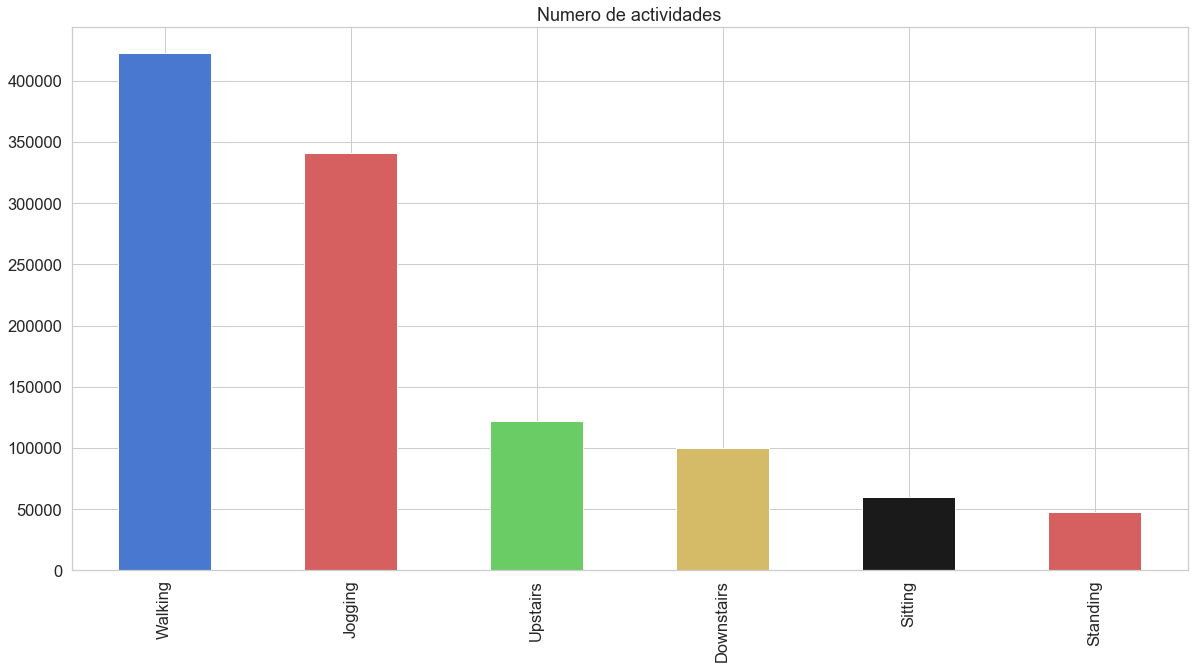

In [8]:
df['activity'].value_counts().plot(kind='bar', title='Numero de actividades',color=['b','r','g','y','k','r']);

In [9]:
df["activity"].value_counts()

Walking       422942
Jogging       341047
Upstairs      122378
Downstairs    100086
Sitting        59705
Standing       48060
Name: activity, dtype: int64

Se puede ve que las actividades están desbalanceadas, existen muchos datos para *Walking* y *Jogging*, ahora a ver que ocurre con los usuarios.

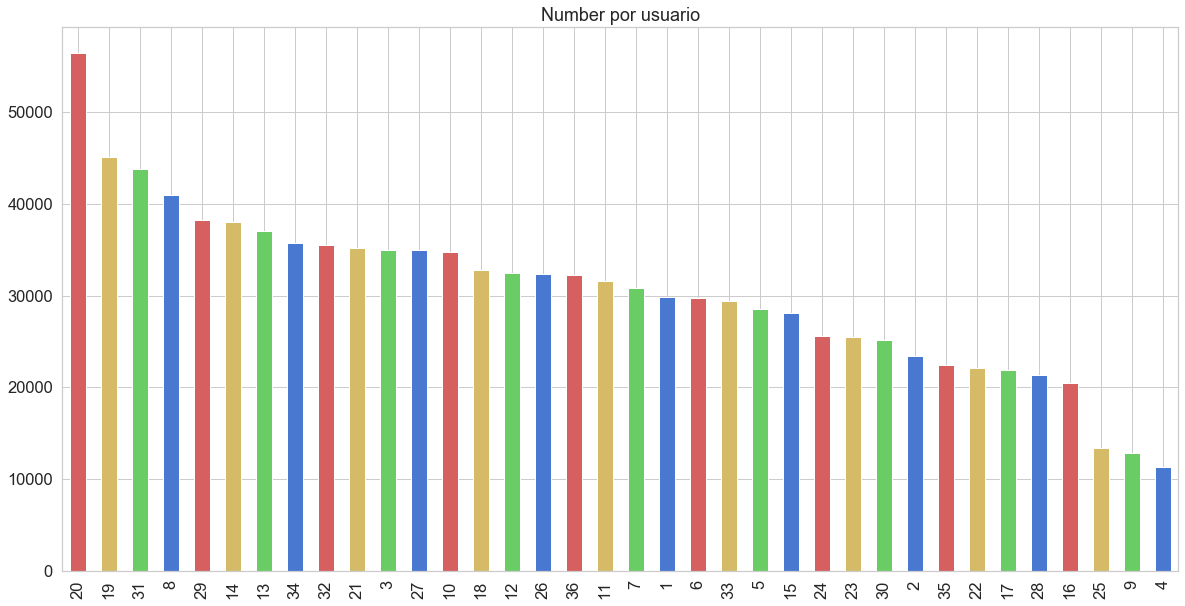

In [10]:
df['user'].value_counts().plot(kind='bar', title='Number por usuario',color=['r','y','g','b']);

Al ver estos datos, se puede ver que los valores no están balanceados, además los datos relacionados a *timestamp* y *user* no son necesarios.

In [11]:
df.drop(columns={"timestamp", "user"}, inplace=True)
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


Ahora, es necesario balancear los datos

In [12]:
min_value_balanced = df.groupby('activity').size().min()
min_value_balanced

48060

In [13]:
df_walking = df[df['activity']=='Walking'].head(min_value_balanced).copy()
df_sitting = df[df['activity']=='Sitting'].head(min_value_balanced).copy()
df_jogging = df[df['activity']=='Jogging'].head(min_value_balanced).copy()
df_standing = df[df['activity']=='Standing'].head(min_value_balanced).copy()
df_lyingDown = df[df['activity']=='LyingDown'].head(min_value_balanced).copy()
df_stairs = df[df['activity']=='Stairs'].head(min_value_balanced).copy()

In [14]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([df_walking, df_sitting, df_jogging, df_standing, df_lyingDown, df_stairs]) 

In [15]:
balanced_data.shape

(192240, 4)

In [16]:
balanced_data["activity"].value_counts()

Walking     48060
Sitting     48060
Jogging     48060
Standing    48060
Name: activity, dtype: int64

Ahora que los datos están balanceados, se debe asignar un valor numérico a cada actividad.

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity']) 
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,3
598,Walking,1.116869,8.621680,3.786457,3
599,Walking,-0.503953,16.657684,1.307553,3
600,Walking,4.794363,10.760075,1.184970,3
601,Walking,-0.040861,9.234595,0.694638,3


In [18]:
label.classes_

array(['Jogging', 'Sitting', 'Standing', 'Walking'], dtype=object)

Por último se deben estandarizar los datos.

In [19]:
from sklearn.preprocessing import StandardScaler

x = balanced_data[['x','y','z']]
y = balanced_data['label']
scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data=x, columns=['x','y','z'])
scaled_x['label'] = y.values

scaled_x

,x,y,z,label
0,-0.102403,0.176712,-0.309979,3
1,-0.054658,0.282145,-0.017341,3
2,-0.338739,1.664493,-0.746932,3
3,0.589895,0.649990,-0.783010,3
4,-0.257573,0.387578,-0.927325,3
...,...,...,...,...
192235,-1.125006,0.242292,-1.019929,2
192236,-1.149544,0.216489,-1.008156,2
192237,-1.049640,0.261214,-0.869826,2
192238,-1.035619,0.268094,-0.813905,2


### Explore

Se van a graficar las señales dada cada actividad

In [20]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x', 'y', 'z']][:200]
    axis = data["x"].plot(subplots=True, 
                     title=activity,color="b")
    axis = data["y"].plot(subplots=True, 
                 title=activity,color="r")
    axis = data["z"].plot(subplots=True, 
             title=activity,color="g")
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

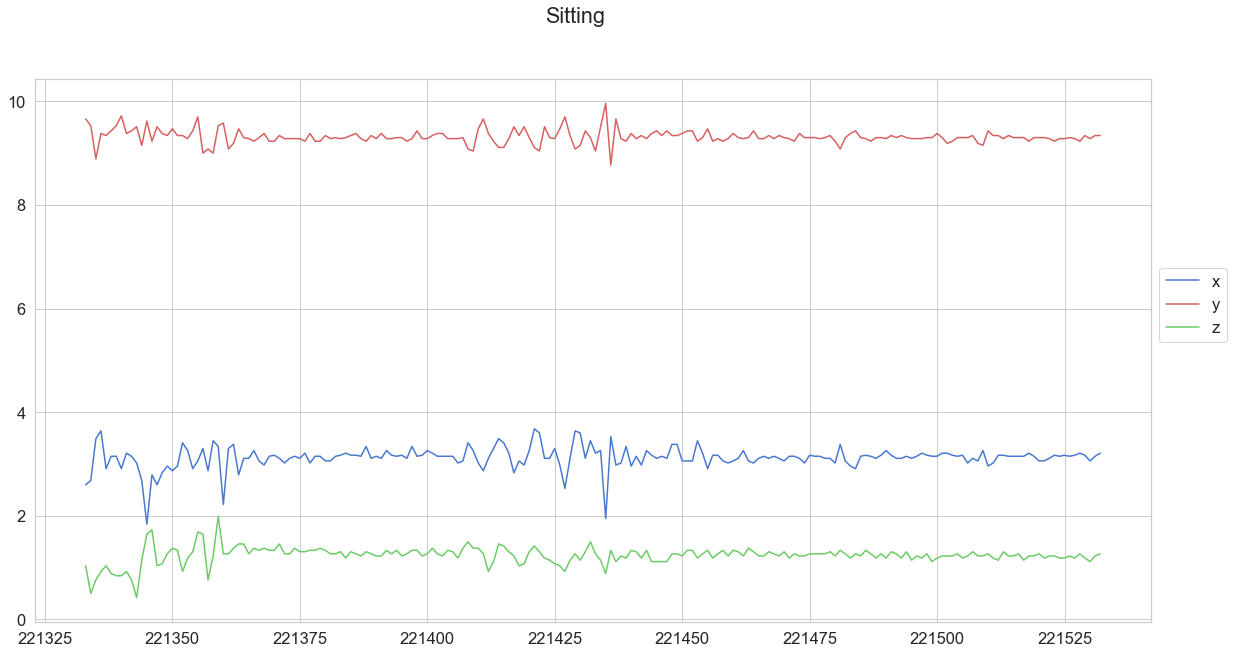

In [21]:
plot_activity("Sitting", df)


Se observa que no hay intersección entre los ejes, debido a la menor frecuencia de las señales y también cuando alguien se está sentando, los sensores tienden a ser más estables que otras actividades.


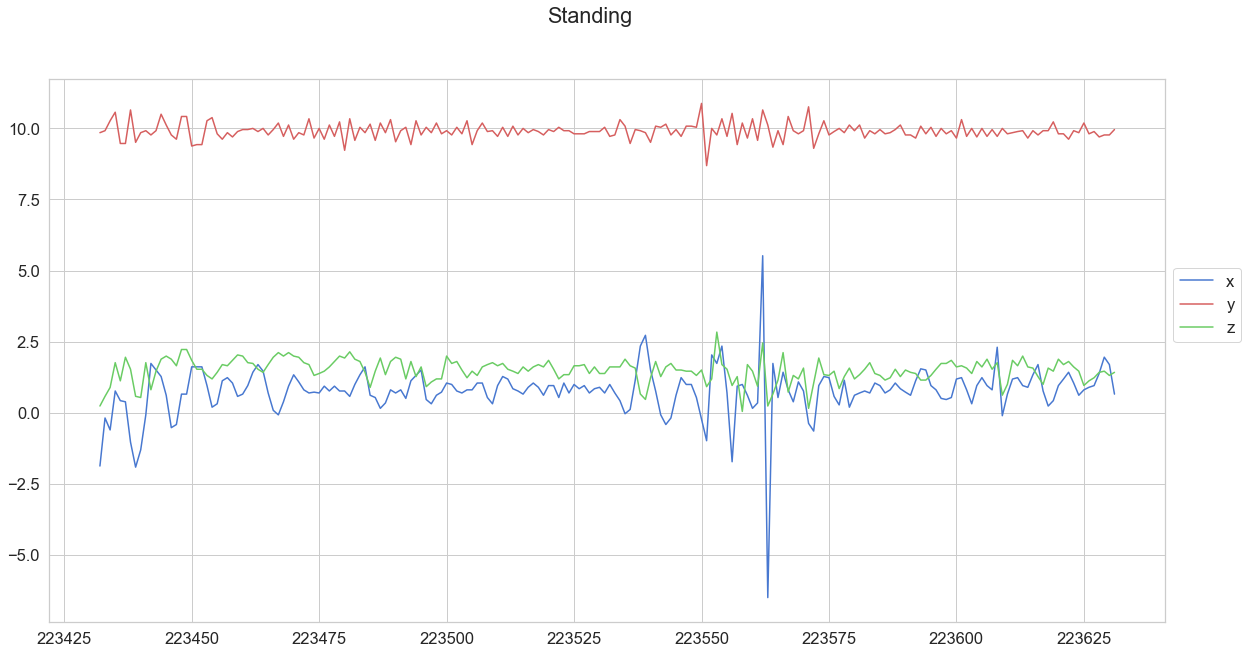

In [22]:
plot_activity("Standing", df)

Los ejes $x,z$ se cruzan al estar de pie, esto es una buena señal para diferenciar entre estar de pie y sentado, ya que en ambas actividades, los sensores tienden a ser estables, pero para estar de pie, podemos notar que los ejes $x,z$ son más sensibles.


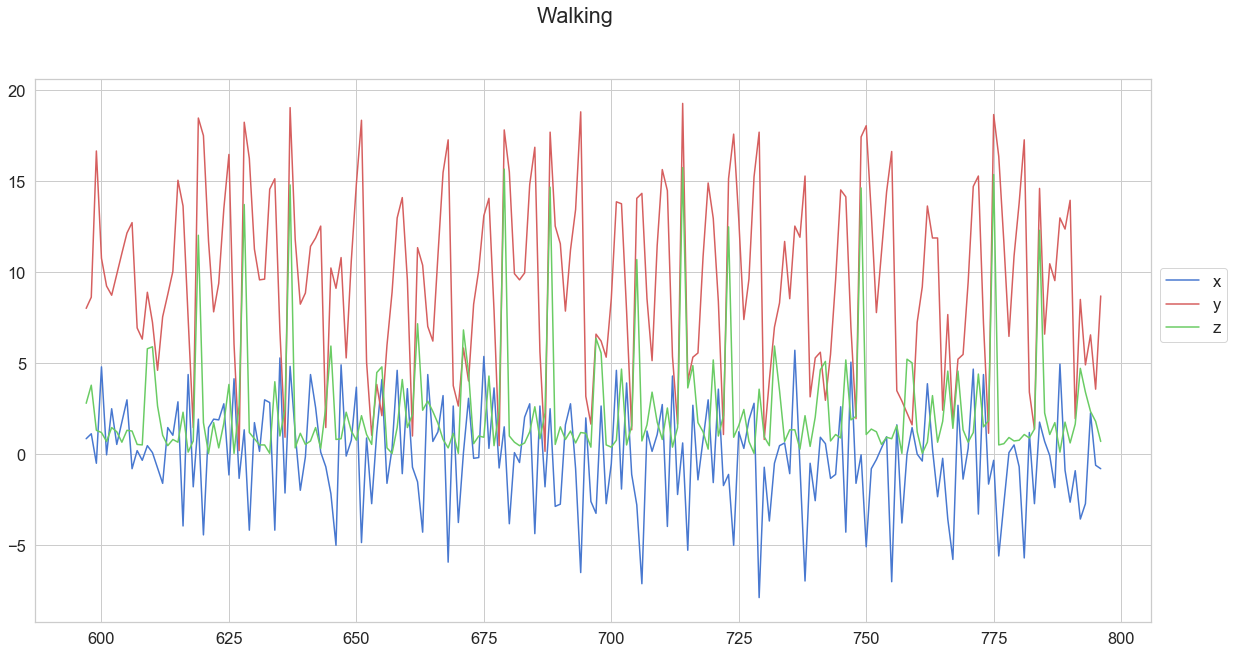

In [23]:
plot_activity("Walking", df)

Sólo se está caminando y ya hay un caos en los datos, esto significa que los sensores son muy sensibles, lo cual es bueno, cuanto más sensible, más preciso para describir una actividad. Para el eje $y$, la longitud de onda es un poco más ancha, mientras que la amplitud no es tan grande.


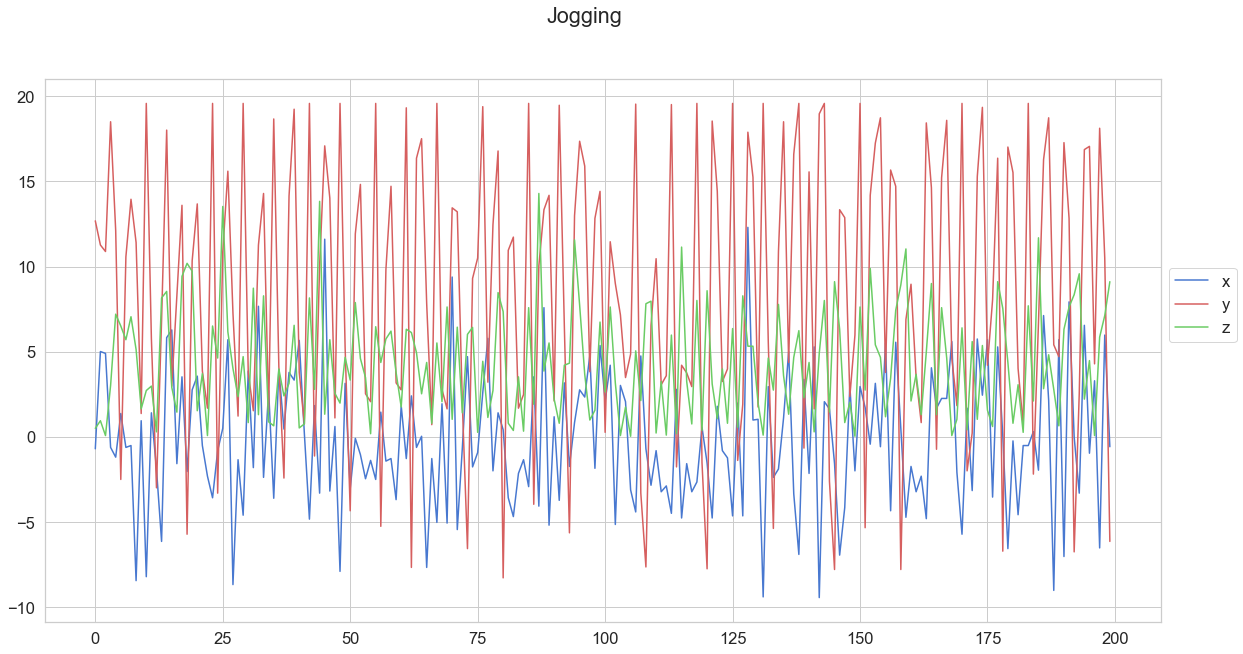

In [24]:
plot_activity("Jogging", df)

A diferencia de caminar, la amplitud es máxima, mientras que la longitud de onda es demasiado pequeña para trotar.

Ahora a analizar como se comporta en una escalera

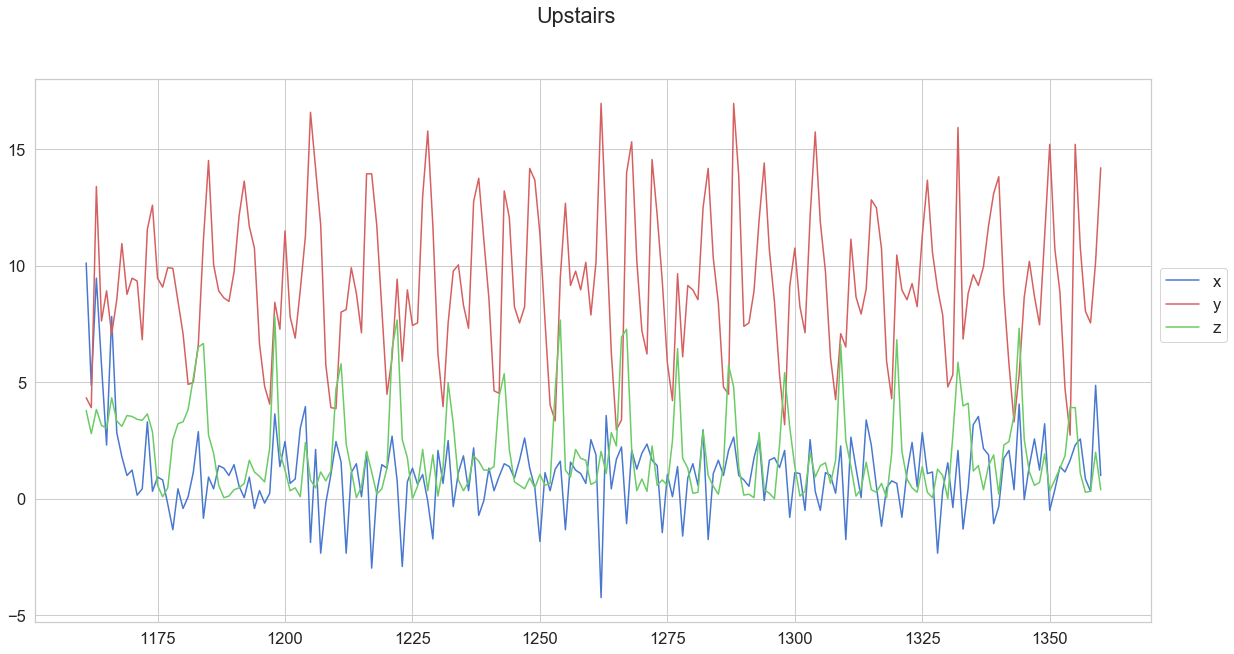

In [25]:
plot_activity("Upstairs", df)

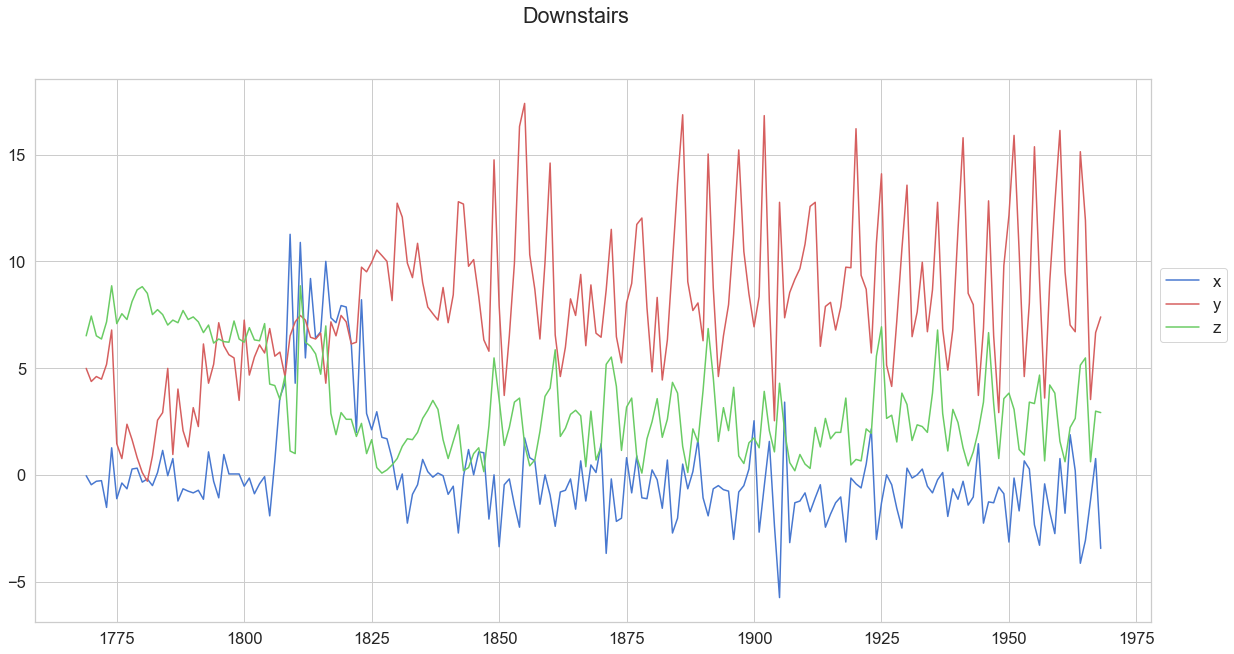

In [26]:
plot_activity("Downstairs", df)

Cuando se suben las escaleras, se nota que la señal del eje $y$ está un poco alejada de los otros dos, mientras que en la planta baja, las señales de los tres ejes se cruzan en algún período de tiempo.

Ahora a ver como están correlacionan los valores dadas las actividades.

In [27]:
plt.rcParams["figure.figsize"] = (15,7)

In [28]:
def plot_corr(activity, df):
    corr = df[df["activity"]==activity].corr()
    corr = corr[["x","y","z"]][2:5]
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=100)    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );


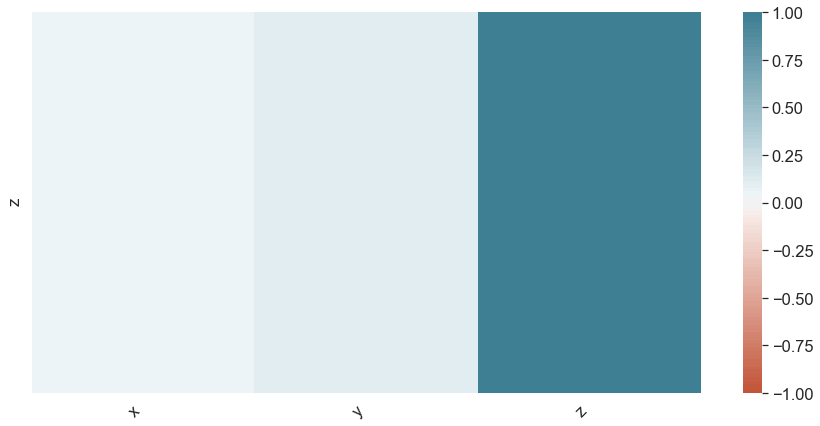

In [29]:
plot_corr("Walking",df)

- $y$, $x$ están correlacionados de forma negativa.
- $y$, $z$ están correlacionados positivamente, 
- $z$, $x$ no están correlacionados


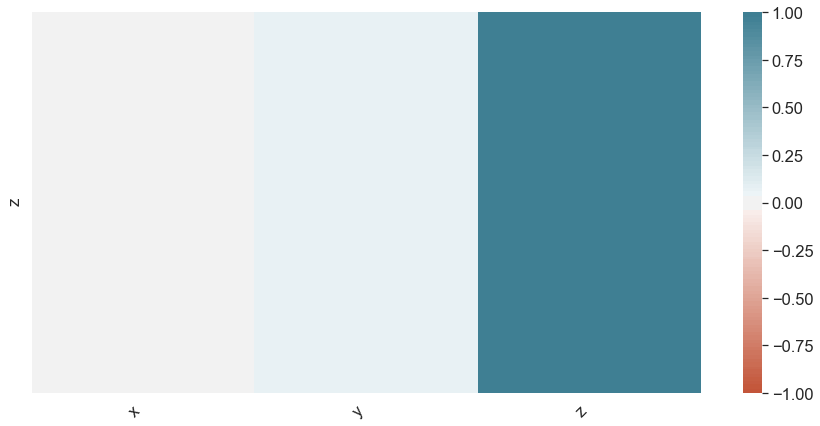

In [30]:
plot_corr("Jogging",df)

Se observa que los ejes $z$, $x$ no están correlacionados, lo cual es bueno para entrenar nuestro modelo, también en la actividad *jogging*, $(x,y), (y,z)$ están positivamente correlacionados.


### Model

In [31]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, average_precision_score, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb

In [32]:
#dividir en conjunto de entrenamiento y prueba.
#70% datos de entrenamiento 30% datos de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(57672, 3)
(57672,)
(134568, 3)
(134568,)


#### SVC

In [34]:
model_svc = SVC()
model_svc.probability=True

In [35]:
model_svc.fit(x_train, y_train)


SVC(probability=True)

In [36]:
pred_svc = model_svc.predict(x_test)

In [37]:
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print('accuracy:', metrics.accuracy_score(pred_svc, y_test))
proba = model_svc.predict_proba(x) 
print("auc:", roc_auc_score(y, proba, multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80     33601
           1       0.95      0.94      0.95     33693
           2       0.80      0.99      0.89     33587
           3       0.77      0.74      0.76     33687

    accuracy                           0.85    134568
   macro avg       0.86      0.85      0.85    134568
weighted avg       0.86      0.85      0.85    134568

[[24481  1265   713  7142]
 [   40 31670  1841   142]
 [   50     0 33284   253]
 [ 2730   254  5682 25021]]
accuracy: 0.8505439629035134
auc: 0.9675391823287312


#### Random Forest

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold

my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

In [39]:
rf_classifier = RandomForestClassifier()

In [40]:
my_param_grid = {'bootstrap': [True], 
                 'n_estimators': [50, 100, 200], 
                 'oob_score': [True, False], 
                 'warm_start': [True, False]}

In [41]:
rf_model_gs = GridSearchCV(estimator = rf_classifier, 
                           param_grid = my_param_grid, 
                           scoring = 'accuracy',
                           cv = my_cv)

In [42]:
rf_model_gs.fit(x_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'n_estimators': [50, 100, 200],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [43]:
rf_best_classifier = rf_model_gs.best_estimator_
#rf_model_gs.cv_results_
rf_best_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': True}

In [44]:
scores = cross_val_score(rf_best_classifier, x_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.8983932493353369,
 0.8968905328863715,
 0.8963703618078834,
 0.9000115593572997,
 0.8996647786383077]

In [45]:
y_test_pred = rf_best_classifier.predict(x_test)

In [46]:
cm = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
print(cm)
print('accuracy:', metrics.accuracy_score(y_test_pred, y_test))
print("auc:", roc_auc_score(y, rf_best_classifier.predict_proba(x), multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     33601
           1       0.99      0.98      0.98     33693
           2       0.94      0.96      0.95     33587
           3       0.80      0.85      0.82     33687

    accuracy                           0.90    134568
   macro avg       0.90      0.90      0.90    134568
weighted avg       0.90      0.90      0.90    134568

[[27336   167   224  5874]
 [  210 32957   253   273]
 [   94    73 32378  1042]
 [ 3544    79  1429 28635]]
accuracy: 0.90144759526782
auc: 0.98867447540591


In [51]:
cm_act = pd.DataFrame(cm,
                      index=rf_best_classifier.classes_,
                      columns=rf_best_classifier.classes_)

cm_act.columns = label.classes_
cm_act.index = label.classes_
cm_act

,Jogging,Sitting,Standing,Walking
Jogging,27336,167,224,5874
Sitting,210,32957,253,273
Standing,94,73,32378,1042
Walking,3544,79,1429,28635


In [57]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(4)],index=label.classes_)
accuracy_per_activity

,0
Jogging,0.813547
Sitting,0.978156
Standing,0.964004
Walking,0.850031


#### XGBoost

In [58]:
xgb_cl = xgb.XGBClassifier()

In [59]:
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [60]:
pred_xgb = xgb_cl.predict(x_test)

In [61]:
print(classification_report(y_test, pred_xgb))
print(confusion_matrix(y_test, pred_xgb))
print('accuracy:', metrics.accuracy_score(pred_xgb, y_test))
print("auc:", roc_auc_score(y, xgb_cl.predict_proba(x), multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83     33601
           1       0.99      0.98      0.98     33693
           2       0.95      0.98      0.96     33587
           3       0.79      0.87      0.83     33687

    accuracy                           0.90    134568
   macro avg       0.90      0.90      0.90    134568
weighted avg       0.90      0.90      0.90    134568

[[26351   312   219  6719]
 [  179 32969   294   251]
 [   69    60 32749   709]
 [ 3140    96  1194 29257]]
accuracy: 0.9015962190119493
auc: 0.9841978417726386


#### Tabla Comparativa



|               | ACC                | P    | R    | F1   | AUC                |
|---------------|--------------------|------|------|------|--------------------|
| SVM           | 0.85054396290351   | 0.86 | 0.85 | 0.85 | 0.96753918232873   |
| Random Forest | 0.90144759526782   | 0.90 | 0.90 | 0.90 | 0.98867447540591   |
| XGBoost       | 0.90159621901194   | 0.90 | 0.90 | 0.90 | 0.98419784177263   |

# Interpretación
 
1. Los clasificadores Random Forest junto a XGBoost han demostrado proporcionar una precisión en sus predicciones sustancialmente mayor al otro modelo SVC. Ambos con un aproximado de 90% de precisión.
 
2. El análisis demostró una diferenciación en la precisión de detección dado diversas actividades:
 
 * Sitting: ~0.97
 * Standing: ~0.96
 * Walking: ~0.85
 * Jogging: ~0.81
 
3. Los perfiles de precisión son consistentes con los patrones de agrupamiento visual vistos en los gráficos dadas sus características tridimensionales, en particular, los agrupamientos de *Sitting* el cual es bastante notable con respecto a los demás.
 
4. Posible explicación a lo obtenido:
 
 * Dado que la actividad de *Sitting* no involucra mayores acciones para los sensores y es solamente estar sentado, el movimiento es mínimo por lo que es simple de visualizar. Lo mismo se puede decir con su acción opuesta *Standing*, donde sólo dos sensores se cruzan permitiendo hacer la diferenciación.
 
 * Por último tenemos *Jogging* y *Walking* donde se tiene una menor precisión en sus predicciones, si bien estos dos son visualmente agrupados en su propio cluster a diferencia de los dos anteriores ya que generan mucho movimiento por lo que los sensores están más activos, la única diferencia entre ambos son su amplitud.

